In [5]:
ans_agg = age_info['ans'] + gen_info['ans']*3 +  mask_info['ans']*6

ans_agg

0         1
1         4
2        13
3         4
4        12
         ..
12595     0
12596     3
12597     3
12598     3
12599     1
Name: ans, Length: 12600, dtype: int64

In [6]:
info['ans'] = ans_agg
info

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,1
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,4
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,13
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,4
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,12
...,...,...
12595,d71d4570505d6af8f777690e63edfa8d85ea4476.jpg,0
12596,6cf1300e8e218716728d5820c0bab553306c2cfd.jpg,3
12597,8140edbba31c3a824e817e6d5fb95343199e2387.jpg,3
12598,030d439efe6fb5a7bafda45a393fc19f2bf57f54.jpg,3


In [7]:
from collections import Counter
Counter(info['ans'])

Counter({1: 1353,
         4: 3133,
         13: 80,
         12: 45,
         3: 3986,
         16: 61,
         0: 3423,
         5: 342,
         6: 32,
         7: 12,
         2: 104,
         17: 2,
         15: 13,
         9: 8,
         10: 5,
         14: 1})

In [8]:
class P:
    def __init__(self) -> None:
        self.do()
    def do(self):
        print('in P')

class C(P):
    
    def do(self):
        print('in C')

c = C()

in C


In [18]:
train_info = pd.read_csv("/opt/ml/input/data/train/train.csv")
train_info

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59
...,...,...,...,...,...
2695,006954,male,Asian,19,006954_male_Asian_19
2696,006955,male,Asian,19,006955_male_Asian_19
2697,006956,male,Asian,19,006956_male_Asian_19
2698,006957,male,Asian,20,006957_male_Asian_20


In [21]:
t_age_info = train_info.groupby(['age']).count()

In [30]:
t_age_info['age'] = t_age_info.index
t_age_info

,id,gender,race,path,age
age,,,,,
18,192,192,192,192,18
19,407,407,407,407,19
20,267,267,267,267,20
21,41,41,41,41,21
22,58,58,58,58,22
23,72,72,72,72,23
24,62,62,62,62,24
25,82,82,82,82,25
26,44,44,44,44,26


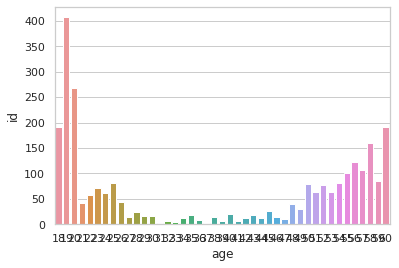

In [46]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="age", y="id", data=t_age_info)
ax.tick_params(width=10)
ax

In [17]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [47]:
adj_55_info = pd.read_csv('./output/age_cls_adj_55/output.csv')
adj_58_info = pd.read_csv('./output/age_cls_adj_58/output.csv')
adj_plain_info = pd.read_csv('./output/age_cls_plain/output.csv')

print(f'adj_55_info:  {Counter(adj_55_info["ans"])}')
print(f'adj_58_info:  {Counter(adj_58_info["ans"])}')
print(f'adj_plain_info:  {Counter(adj_plain_info["ans"])}')


adj_55_info:  Counter({0: 6940, 1: 3570, 2: 2090})
adj_58_info:  Counter({0: 8823, 2: 2383, 1: 1394})
adj_plain_info:  Counter({0: 7227, 1: 4851, 2: 522})


In [48]:
from sklearn.model_selection import StratifiedKFold
np.random.seed(32)

In [74]:
X = np.zeros(10)
y = np.random.randint(3,size=10)
print(X)
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1 1 2 0 2 0 0 1 0 0]


In [75]:
skf = StratifiedKFold()
for t, v in skf.split(X, y):
    print(t)
    print(v)
    print('-'*10)

[1 2 4 5 6 7 8 9]
[0 3]
----------
[0 2 3 4 6 7 8 9]
[1 5]
----------
[0 1 2 3 4 5 8 9]
[6 7]
----------
[0 1 3 4 5 6 7 9]
[2 8]
----------
[0 1 2 3 5 6 7 8]
[4 9]
----------


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [76]:
skf = StratifiedKFold()
for t, v in skf.split(X, y):
    print(t)
    print(v)
    print('-'*10)

[1 2 4 5 6 7 8 9]
[0 3]
----------
[0 2 3 4 6 7 8 9]
[1 5]
----------
[0 1 2 3 4 5 8 9]
[6 7]
----------
[0 1 3 4 5 6 7 9]
[2 8]
----------
[0 1 2 3 5 6 7 8]
[4 9]
----------


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [77]:
skf2 = StratifiedKFold()
for t, v in skf2.split(X, y):
    print(t)
    print(v)
    print('-'*10)

[1 2 4 5 6 7 8 9]
[0 3]
----------
[0 2 3 4 6 7 8 9]
[1 5]
----------
[0 1 2 3 4 5 8 9]
[6 7]
----------
[0 1 3 4 5 6 7 9]
[2 8]
----------
[0 1 2 3 5 6 7 8]
[4 9]
----------


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [84]:
import sys
sys.path.append('/opt/ml/image-classification-level1-32')
import os
import numpy as np

In [82]:
from dataset import MaskSKFSplitByProfileDataset
data_dir = '/opt/ml/input/data/train/images'
profiles = os.listdir(data_dir)
profiles = [profile for profile in profiles if not profile.startswith(".")]
        
ds = MaskSKFSplitByProfileDataset(data_dir)

sp_pro_1 = ds._split_profile(profiles, 0.2)
sp_pro_1

{'train': array([ 442,  484,  492, ..., 2697, 2698, 2699]),
 'val': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165,

In [83]:
ds2 = MaskSKFSplitByProfileDataset(data_dir)

sp_pro_2 = ds2._split_profile(profiles, 0.2)
sp_pro_2

{'train': array([ 442,  484,  492, ..., 2697, 2698, 2699]),
 'val': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165,

In [85]:
np.array_equal(sp_pro_1['train'], sp_pro_2['train'])

True

In [86]:
import torch

In [88]:
torch.argmax(torch.tensor([1,2,3,4,5,6,7]), dim=-1)

tensor(6)

In [95]:
a = [1,2,3]
b = [4,5,6]
a_b = np.concatenate([a,b])
a.extend(b)

print(a_b)
print(len(a_b))
print(a)
print(len(a))
print(type(a_b))
print(type(a))

[1 2 3 4 5 6]
6
[1, 2, 3, 4, 5, 6]
6
<class 'numpy.ndarray'>
<class 'list'>


In [96]:
prev_sm = pd.read_csv("./output/agg_cls/output.csv")
val_sm = pd.read_csv("./output/agg_cls_val/output.csv")

In [99]:
prev_sm = pd.read_csv("./output/agg_cls/output.csv")
ans_prev = prev_sm.groupby(['ans']).count()
ans_val = val_sm.groupby(['ans']).count()
ans_prev['ans'] = ans_prev.index
ans_val['ans'] = ans_val.index
print(ans_prev)
print(ans_val)


     ImageID  ans
ans              
0       3423    0
1       1353    1
2        104    2
3       3986    3
4       3133    4
5        342    5
6         32    6
7         12    7
9          8    9
10         5   10
12        45   12
13        80   13
14         1   14
15        13   15
16        61   16
17         2   17
     ImageID  ans
ans              
0       3500    0
1       1298    1
2         97    2
3       3922    3
4       3168    4
5        341    5
6         30    6
7         21    7
9         11    9
10         7   10
12        57   12
13        88   13
14         2   14
15         8   15
16        49   16
17         1   17


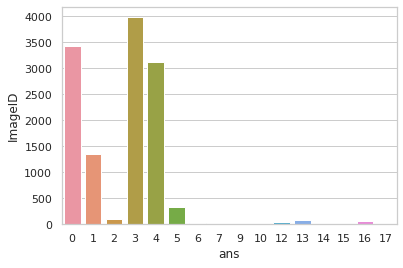

In [100]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="ans", y="ImageID", data=ans_prev)
ax.tick_params(width=10)
ax

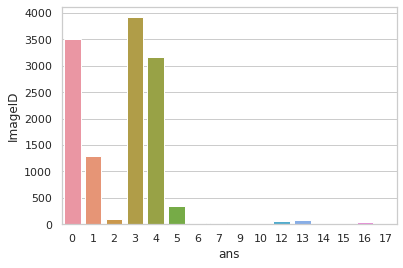

In [101]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="ans", y="ImageID", data=ans_val)
ax.tick_params(width=10)
ax

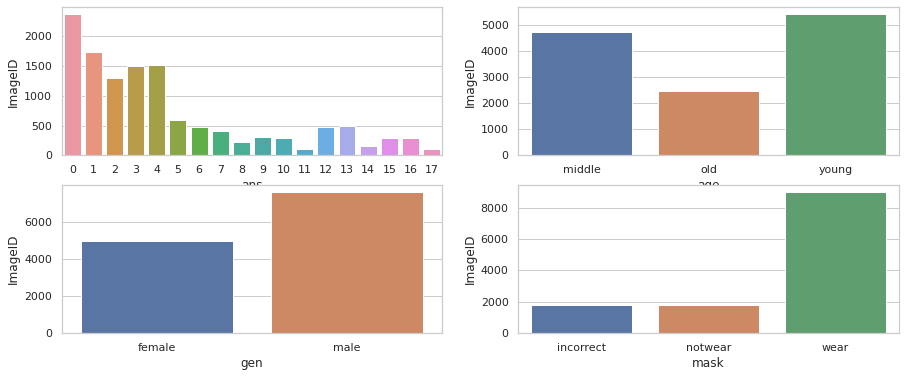

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
def age(cls):
    if cls in [age for age in range(0, 18, 3)]:
        return 'young'
    elif cls in [age for age in range(1, 18, 3)]:
        return 'middle'
    else:
        return 'old'
def gender(cls):
    male_cls = np.concatenate([[i for i in range(gender, gender+3)] for gender in range(0, 18, 6)])
    if cls in male_cls:
        return 'male'
    else:
        return 'female'
        
def mask(cls):
    if cls in [i for i in range(6)]:
        return 'wear'
    elif cls in [i for i in range(6, 12)]:
        return 'incorrect'
    else:
        return 'notwear'

def showAnsDist(path, mode=None):
    sns.set_theme(style="whitegrid")
    sota_sm = pd.read_csv(path) 
    chart, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
    
    if mode is None:
        sota_sm['age'] = list(map(age, sota_sm.ans))
        age_sota = sota_sm.groupby(['age']).count()
        age_sota['age'] = age_sota.index
        sns.barplot(ax=axes[0][1], x='age', y='ImageID', data=age_sota)

        sota_sm['gen'] = list(map(gender, sota_sm.ans))
        gen_sota = sota_sm.groupby(['gen']).count()
        gen_sota['gen'] = gen_sota.index
        sns.barplot(ax=axes[1][0], x='gen', y='ImageID', data=gen_sota)
        

        sota_sm['mask'] = list(map(mask, sota_sm.ans))
        mask_sota = sota_sm.groupby(['mask']).count()
        mask_sota['mask'] = mask_sota.index
        sns.barplot(ax=axes[1][1], x='mask', y='ImageID', data=mask_sota)

    ans_sota = sota_sm.groupby(['ans']).count()
    ans_sota['ans'] = ans_sota.index
    sns.barplot(ax=axes[0][0], x='ans', y='ImageID', data=ans_sota)

showAnsDist("./sota_output.csv")

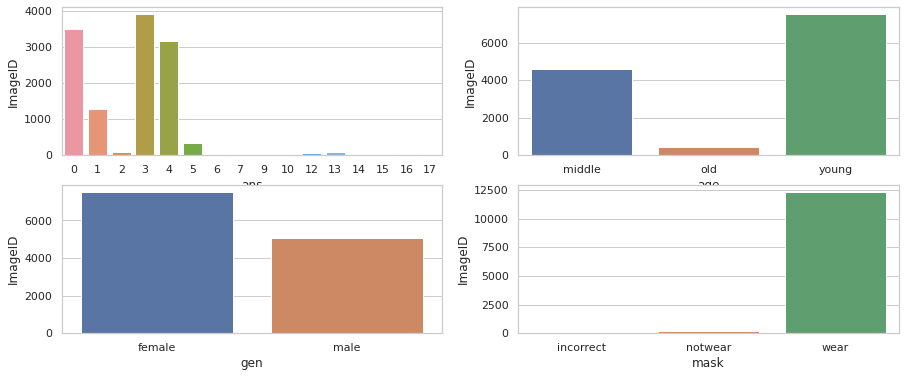

In [178]:
showAnsDist('./output/agg_cls_val/output.csv')

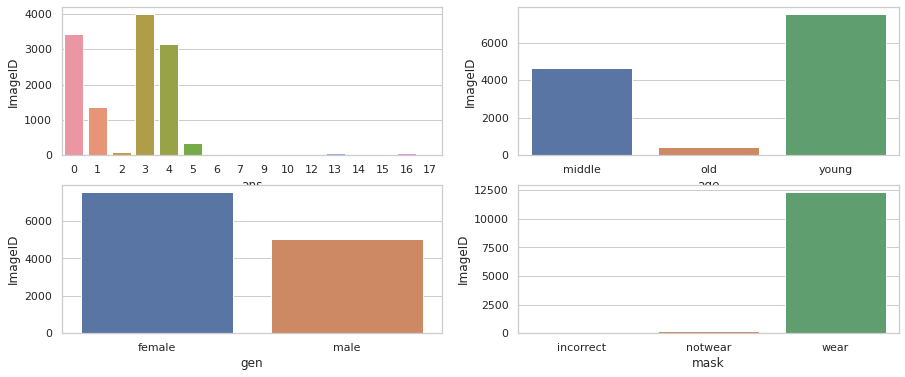

In [179]:
showAnsDist('./output/agg_cls/output.csv')

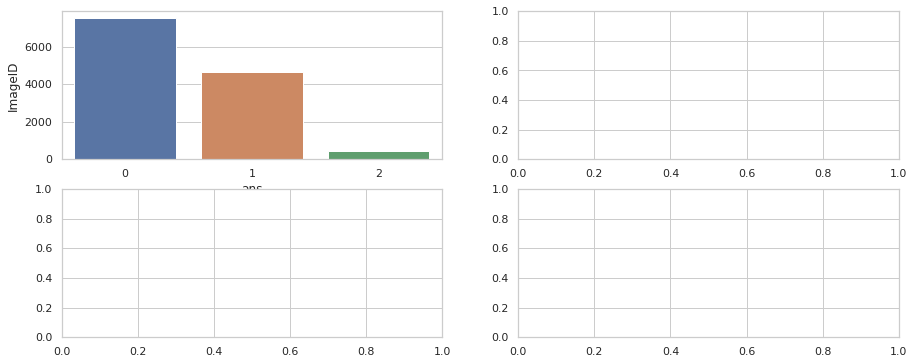

In [180]:
showAnsDist('./output/age_cls/output.csv', mode=True)

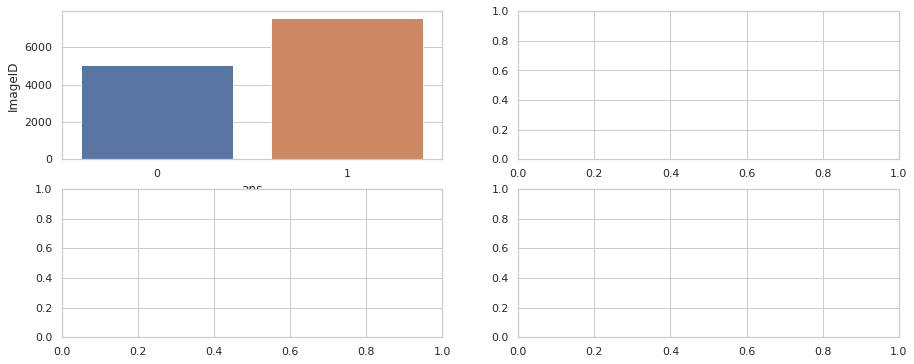

In [183]:
showAnsDist("./output/gen_cls/output.csv", mode=True)

In [184]:
showAnsDist("./output/mask_cls/output.csv", mode=True)

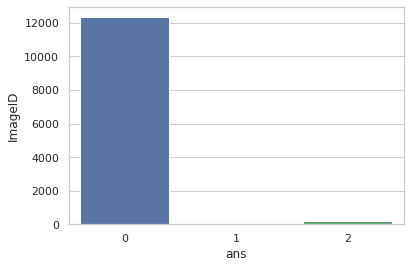

In [112]:
showAnsDist("./output/mask_cls/output.csv")

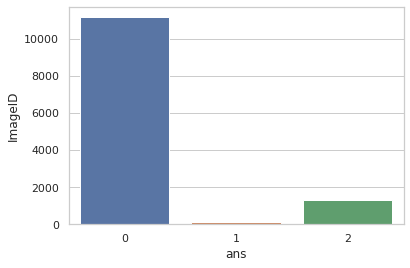

In [113]:
showAnsDist("./output/backup/age_cls/output.csv")